In [1]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('CarPrice_Assignment.csv')

# Verificar o número de observações e features
num_observations = df.shape[0]
num_features = df.shape[1]

print(f"Número de observações: {num_observations}")
print(f"Número de features: {num_features}")


Número de observações: 205
Número de features: 26


In [8]:
# Obter um resumo estatístico dos dados
stats = df.describe()

# Exibir o resumo estatístico para verificar as colunas
print(stats)

# Obter o preço médio a partir do resumo estatístico
# Assumindo que a coluna com preços se chama 'price'
preco_medio = stats.loc['mean', 'price']
print(f"O preço médio aproximado de um carro é: {preco_medio}")

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [5]:
print(df['price'].dtype)


object


In [6]:
print(df['price'].head(10))


0         13495
1         16500
2         16500
3         13950
4         17450
5         15250
6         17710
7         18920
8         23875
9    17.859.167
Name: price, dtype: object


In [7]:
import pandas as pd

# Carregar o conjunto de dados
df = pd.read_csv('CarPrice_Assignment.csv')

# Verificar o tipo de dados da coluna 'price'
print(df['price'].dtype)

# Verificar os primeiros valores para entender o formato
print(df['price'].head(10))

# Limpar a coluna e converter para numérico
# Primeiro, removemos qualquer caractere não numérico (se aplicável)
df['price'] = df['price'].replace('[\$,]', '', regex=True)

# Converter a coluna para numérico, forçando erros a NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Verificar se a conversão foi bem-sucedida
print(df['price'].dtype)
print(df['price'].head(10))

# Calcular o preço médio, ignorando NaN
preco_medio = df['price'].mean()
print(f"O preço médio aproximado de um carro é: {preco_medio:.2f}")


object
0         13495
1         16500
2         16500
3         13950
4         17450
5         15250
6         17710
7         18920
8         23875
9    17.859.167
Name: price, dtype: object
float64
0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
5    15250.0
6    17710.0
7    18920.0
8    23875.0
9        NaN
Name: price, dtype: float64
O preço médio aproximado de um carro é: 13254.25


<>:14: SyntaxWarning: invalid escape sequence '\$'
<>:14: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mari_\AppData\Local\Temp\ipykernel_8456\3283532846.py:14: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True)


In [9]:
# Remover a coluna 'car_ID'
df = df.drop(columns=['car_ID'])

# Verificar se a coluna foi removida
print(df.head())

   symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9

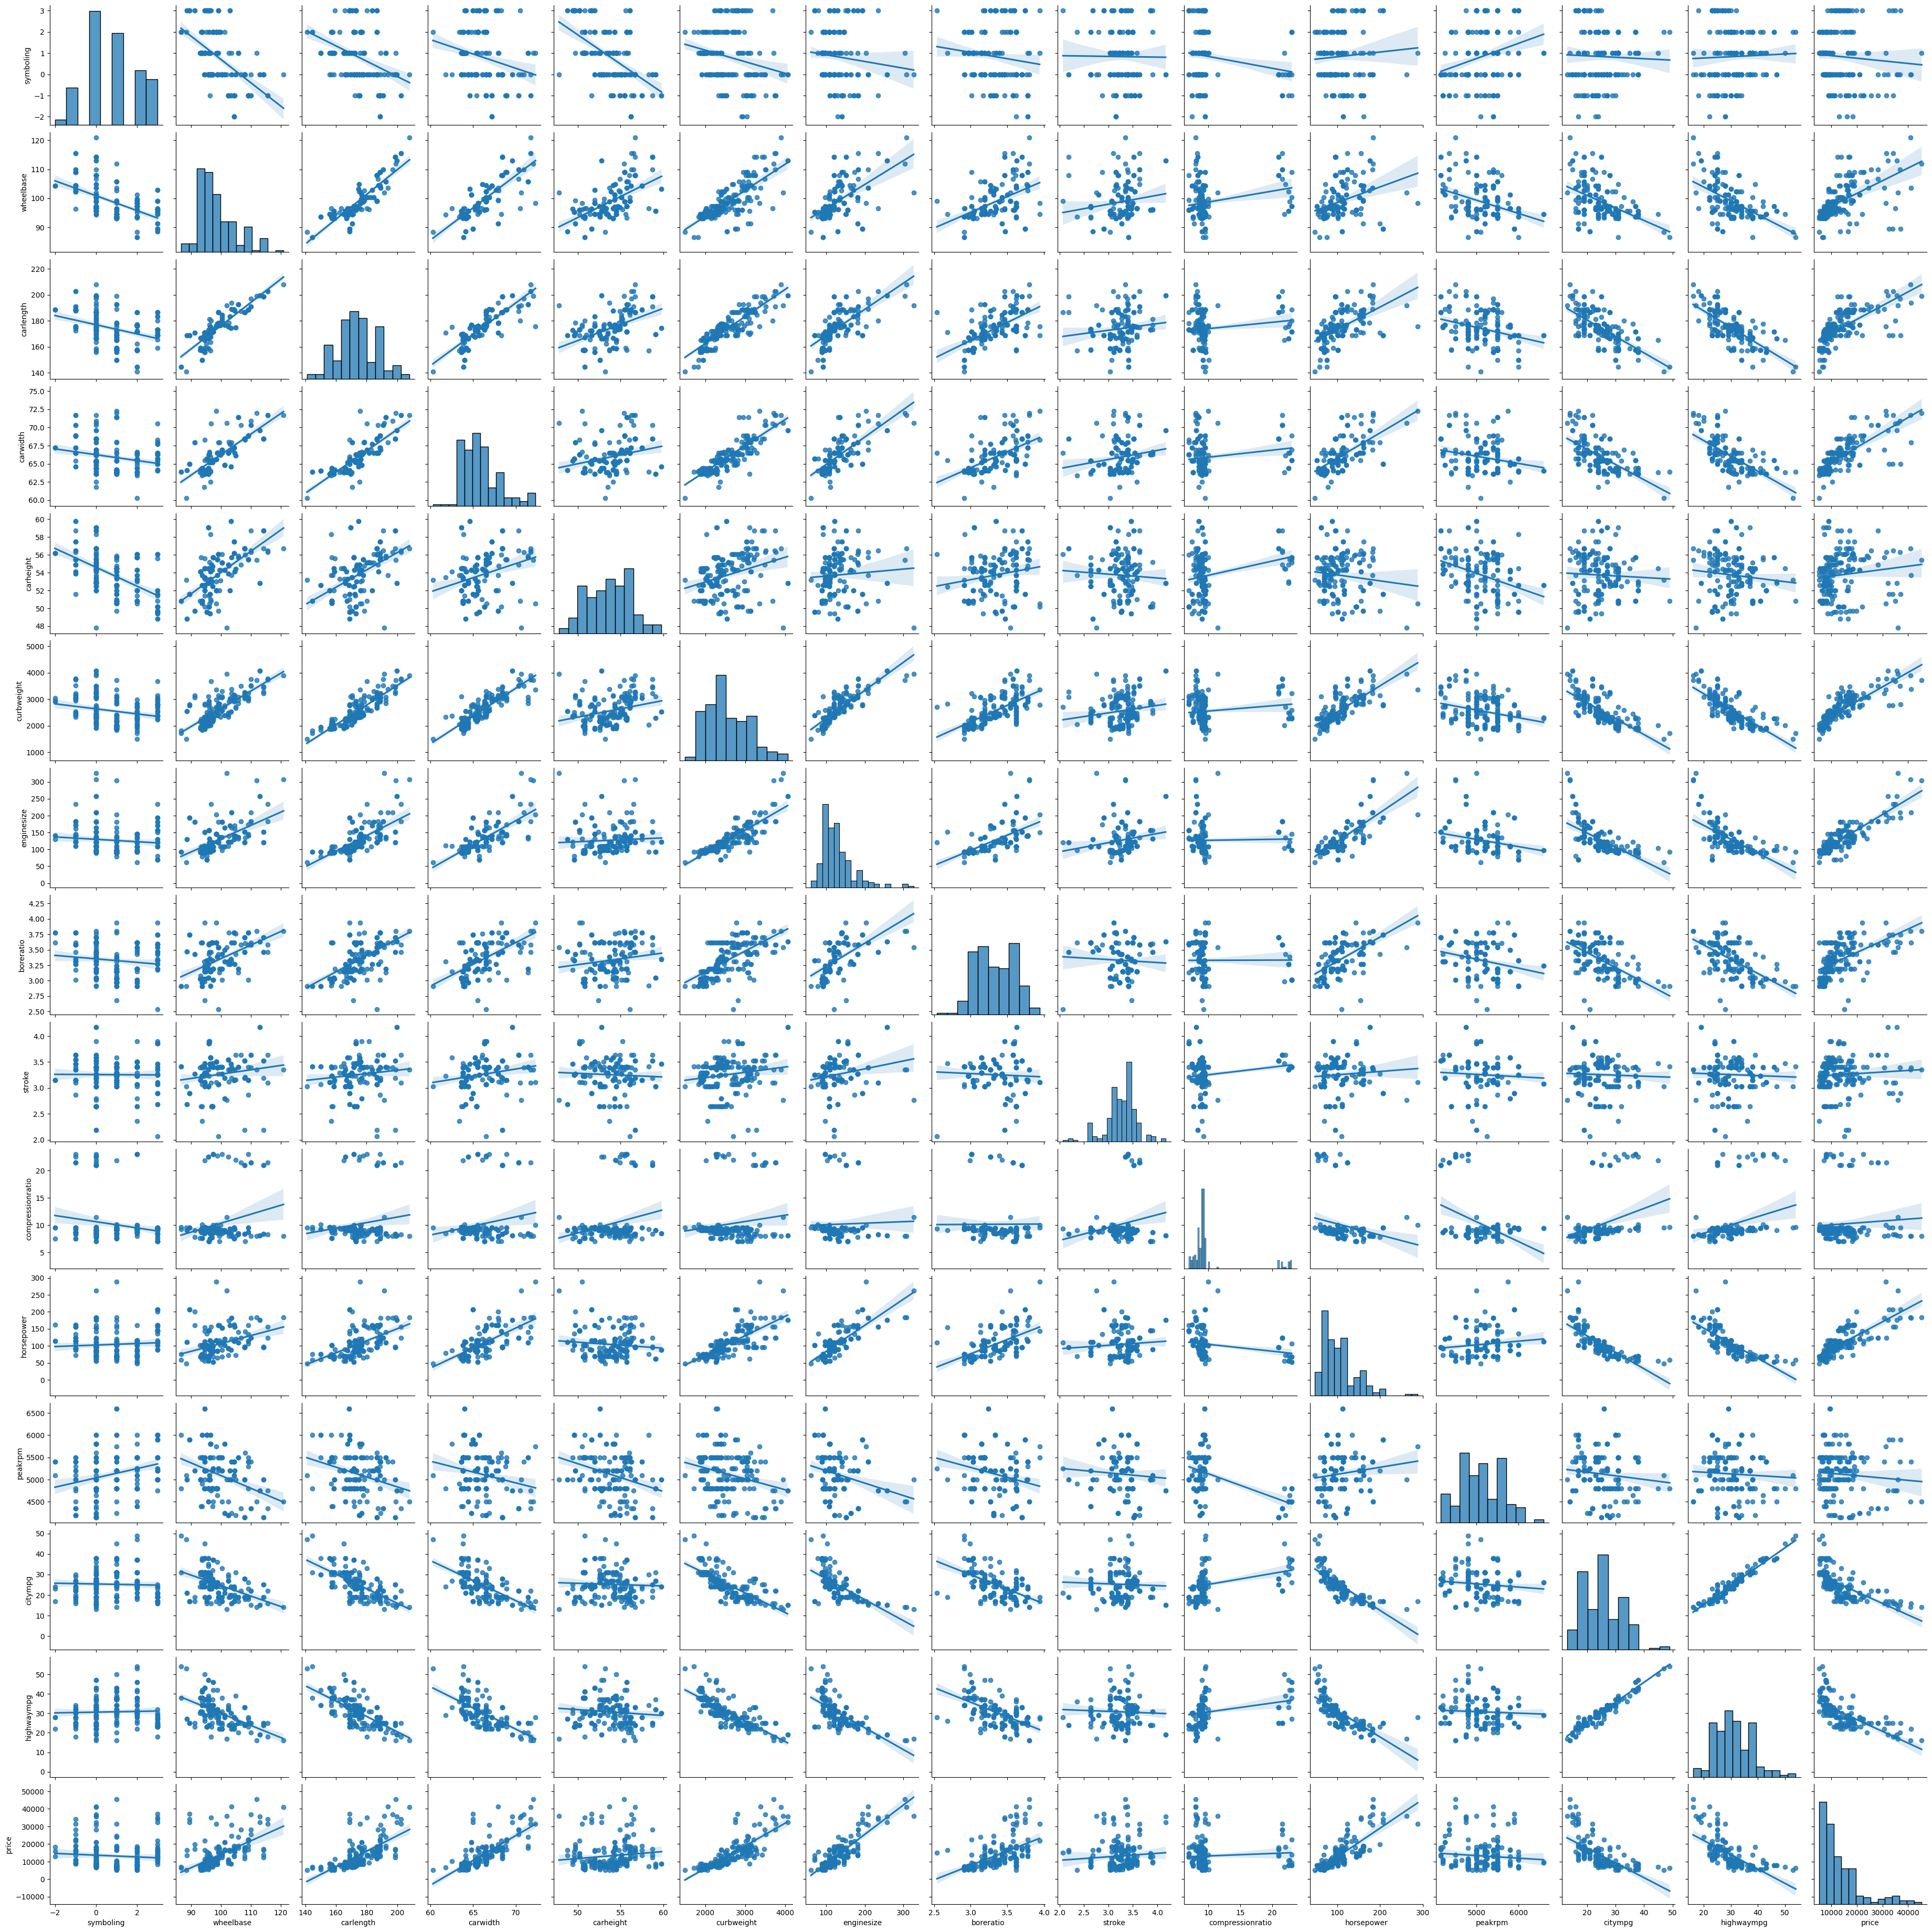

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,kind = 'reg')
plt.show()

In [11]:
# Identificar colunas do tipo 'object'
colunas_string = df.select_dtypes(include=['object']).columns

# Remover colunas do tipo 'object'
df_numerico = df.drop(columns=colunas_string)

# Contar o número de colunas restantes
num_colunas_restantes = df_numerico.shape[1]

print(f"Número de colunas após remover as colunas de tipo 'string': {num_colunas_restantes}")

Número de colunas após remover as colunas de tipo 'string': 15


In [13]:
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes (X) e a variável dependente (y)
# Supondo que 'price' é a variável dependente (target)
X = df_numerico.drop(columns=['price'])
y = df_numerico['price']

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Verificar as formas dos conjuntos resultantes
print(f"Forma do conjunto de treino (X_train): {X_train.shape}")
print(f"Forma do conjunto de teste (X_test): {X_test.shape}")
print(f"Forma do conjunto de treino (y_train): {y_train.shape}")
print(f"Forma do conjunto de teste (y_test): {y_test.shape}")

Forma do conjunto de treino (X_train): (137, 14)
Forma do conjunto de teste (X_test): (68, 14)
Forma do conjunto de treino (y_train): (137,)
Forma do conjunto de teste (y_test): (68,)


In [14]:
from sklearn.preprocessing import StandardScaler

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Ajustar o scaler nos dados de treino e transformar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Transformar os dados de teste usando o mesmo scaler
X_test_scaled = scaler.transform(X_test)

# Verificar as formas dos conjuntos escalados
print(f"Forma dos dados de treino escalados: {X_train_scaled.shape}")
print(f"Forma dos dados de teste escalados: {X_test_scaled.shape}")

Forma dos dados de treino escalados: (137, 14)
Forma dos dados de teste escalados: (68, 14)


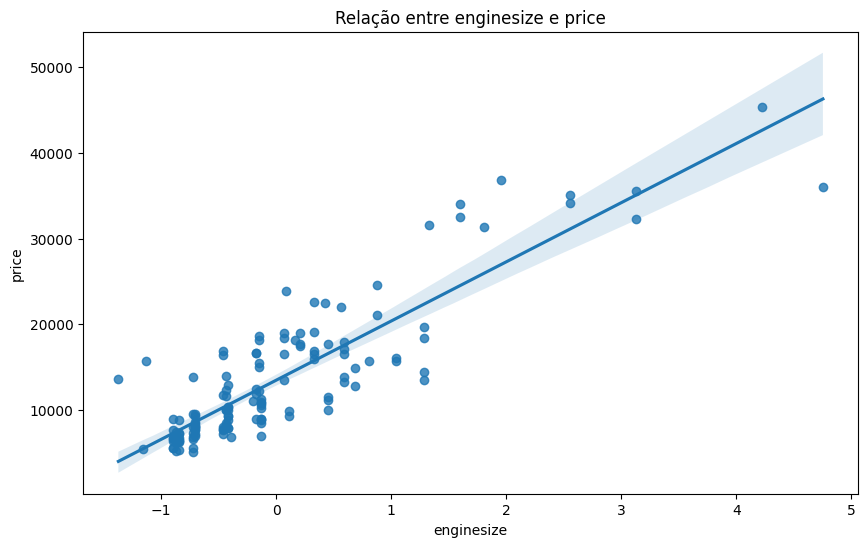

In [16]:
# Adicionar a variável 'price' ao conjunto de dados de treino escalado
df_treino = pd.DataFrame(X_train_scaled, columns=X.columns)
df_treino['price'] = y_train.values

# Criar o regplot para visualizar a relação entre 'enginesize' e 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x='enginesize', y='price', data=df_treino)
plt.title('Relação entre enginesize e price')
plt.xlabel('enginesize')
plt.ylabel('price')
plt.show()

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Treinar o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Fazer previsões com o conjunto de treino
preds_treino = modelo.predict(X_train_scaled)

# Calcular os resíduos
residuos = preds_treino - y_train.values

# Calcular a soma dos resíduos
soma_residuos = np.sum(residuos)

# Exibir o resultado
print(f"Soma dos resíduos: {soma_residuos:.2f}")

# Opcional: Mostrar os resíduos
print("Resíduos:")
print(residuos)

Soma dos resíduos: -0.00
Resíduos:
[-9.67358143e+02  1.45064476e+02 -6.87503153e+02 -1.35140917e+03
  1.80571390e+03 -2.63537989e+02  1.92485552e+03  2.25240515e+03
 -2.39026382e+03  3.08623353e+03  7.11285045e+02  2.96141023e+02
 -1.32963098e+03 -2.14750684e+03  1.52528756e+03  8.32092771e+02
  1.05929454e+02  1.11907705e+03  2.74050360e+02 -8.98708138e+02
 -7.94231609e+03  3.08767732e+03  3.39301696e+03  1.28807501e+03
  1.48528497e+03 -2.26825075e+01 -2.02786281e+02 -8.52522120e+02
 -4.18702097e+03  1.74374166e+03 -4.06150388e+03 -2.35746326e+03
 -1.89509473e+03  2.14953980e+03 -2.59877004e+02 -6.44231609e+03
  4.58016565e+01  1.63991783e+03 -7.01669718e+02 -4.66071084e+02
  3.43292496e+03 -8.60943767e+02 -1.04183575e+03  2.96251575e+03
 -2.82043814e+03  2.61899072e+02 -6.42898498e+02 -5.09753465e+02
  2.60240822e+03 -1.61341488e+00  1.21998896e+03  2.23109393e+03
 -6.13199469e+03 -2.61339994e+03 -7.20048930e+02 -3.78035045e+03
  2.45028382e+03  2.03486390e+03 -2.63187629e+03  4.547

Correlação entre resíduos e enginesize: 0.00


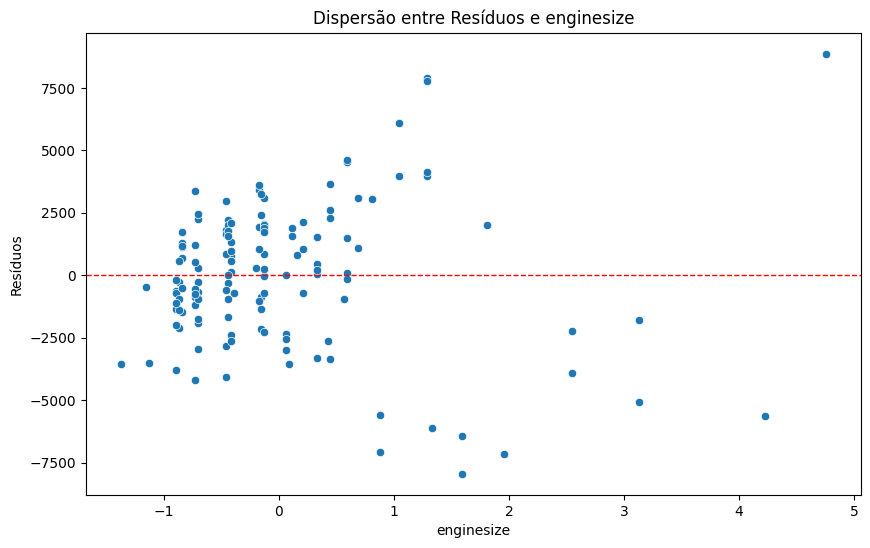

In [20]:
# Adicionar os resíduos e a variável 'enginesize' ao conjunto de dados de treino
df_treino = pd.DataFrame(X_train_scaled, columns=X.columns)
df_treino['price'] = y_train.values
df_treino['residuos'] = residuos

# Calcular a correlação entre resíduos e 'enginesize'
correlacao_enginesize_residuos = df_treino['residuos'].corr(df_treino['enginesize'])
print(f"Correlação entre resíduos e enginesize: {correlacao_enginesize_residuos:.2f}")

# Criar um gráfico de dispersão para visualizar a relação
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enginesize', y='residuos', data=df_treino)
plt.title('Dispersão entre Resíduos e enginesize')
plt.xlabel('enginesize')
plt.ylabel('Resíduos')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.show()

In [21]:
from statsmodels.stats.stattools import durbin_watson

# Calculando o teste de Durbin-Watson
dw_statistic = durbin_watson(residuos)

# Imprimindo o valor do teste
print(f"Valor do teste de Durbin-Watson: {dw_statistic:.2f}")

Valor do teste de Durbin-Watson: 1.89


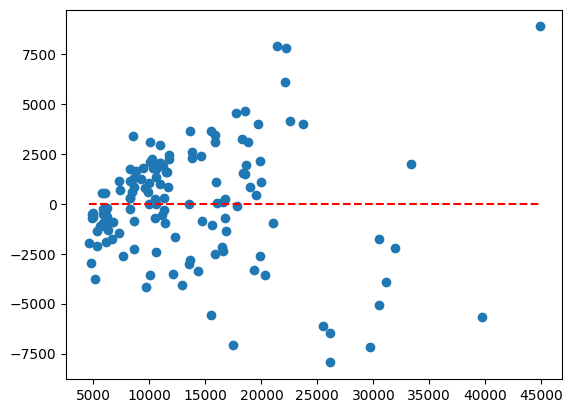

In [22]:
plt.scatter(preds_treino,residuos)
plt.hlines(y = 0, xmin = preds_treino.min(), xmax = preds_treino.max(),color='r',  linestyles= 'dashed')
plt.show()

In [27]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
df_exog_het = X_train[['enginesize']]
df_exog_het[0] = 1.
lzip(names, sms.het_breuschpagan(residuos,np.array(df_exog_het[[0,'enginesize']])))

C:\Users\mari_\AppData\Local\Temp\ipykernel_8456\338153921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exog_het[0] = 1


[('Lagrange multiplier statistic', np.float64(55.28781083208305)),
 ('p-value', np.float64(1.0411220757404676e-13)),
 ('f-value', np.float64(91.34321988354928)),
 ('f p-value', np.float64(7.571316817207171e-17))]

In [28]:
# Criar um DataFrame para os dados de regressão para o teste
df_exog_het = X_train[['enginesize']].copy()  # Copia a coluna enginesize
df_exog_het['const'] = 1  # Adiciona a constante

# Converter df_exog_het para um array NumPy para o teste
exog_het_array = np.array(df_exog_het)

# Realizar o teste de Breusch-Pagan
bp_test = sms.het_breuschpagan(residuos, exog_het_array)

# Nomear os resultados
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = lzip(names, bp_test)

# Exibir os resultados
print(pd.DataFrame(bp_results, columns=['Teste', 'Valor']))

                           Teste         Valor
0  Lagrange multiplier statistic  5.528781e+01
1                        p-value  1.041122e-13
2                        f-value  9.134322e+01
3                      f p-value  7.571317e-17


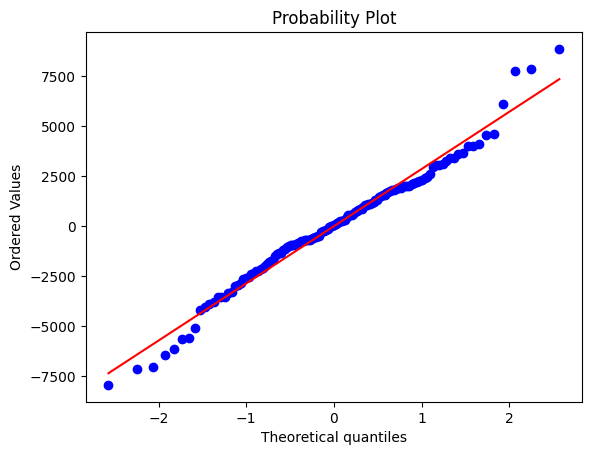

In [29]:
from scipy import stats
stats.probplot(residuos, plot=plt)
plt.show()

In [30]:
stats.shapiro(residuos)

ShapiroResult(statistic=np.float64(0.9810917015828038), pvalue=np.float64(0.05433036517776268))

In [33]:
df_regressao = X_train[['enginesize']]
df_regressao['price'] = y_train

from statsmodels.formula.api import ols
regressor = ols('price ~ enginesize',data = df_regressao).fit()

C:\Users\mari_\AppData\Local\Temp\ipykernel_8456\685875940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regressao['price'] = y_train


In [34]:
import statsmodels.api as sm

# Adicione uma constante para o intercepto
X_train_with_const = sm.add_constant(X_train)

# Ajustar o modelo de regressão linear
model = sm.OLS(y_train, X_train_with_const).fit()

# Exibir o resumo do modelo para obter o p-valor
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     58.46
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           3.46e-47
Time:                        23:55:51   Log-Likelihood:                -1284.1
No. Observations:                 137   AIC:                             2598.
Df Residuals:                     122   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -6.19e+04   1.67e+04  

In [35]:
# 1. Instanciar o modelo
modelo = LinearRegression()

# 2. Treinar o modelo
modelo.fit(X_train, y_train)

# 3. Calcular o R² no conjunto de treino
r2_treino = modelo.score(X_train, y_train)

print(f"Valor aproximado de R quadrado no conjunto de treino: {r2_treino:.4f}")

Valor aproximado de R quadrado no conjunto de treino: 0.8703


In [39]:
# Verifique valores ausentes em X_test
print("Valores ausentes em X_test:")
print(np.isnan(X_test).sum())

# Verifique valores ausentes em y_test
print("Valores ausentes em y_test:")
print(np.isnan(y_test).sum())


Valores ausentes em X_test:
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64
Valores ausentes em y_test:
1


In [42]:
# Remover linhas com valores ausentes
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Certifique-se de que y_test corresponda às linhas restantes em X_test

# Verifique novamente se há valores ausentes
print("Valores ausentes após remoção:")
print(np.isnan(X_test).sum())
print(np.isnan(y_test).sum())


Valores ausentes após remoção:
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64
1


In [44]:
# Verifique o índice do valor ausente
missing_index = y_test[y_test.isna()].index

# Remova a linha correspondente de X_test
X_test_cleaned = X_test.drop(index=missing_index)

# Remova o valor ausente de y_test
y_test_cleaned = y_test.drop(index=missing_index)

# Verifique se ainda há valores ausentes
print("Valores ausentes após limpeza em y_test:")
print(np.isnan(y_test_cleaned).sum())


Valores ausentes após limpeza em y_test:
0


In [45]:
# Recalcular o R² no conjunto de teste limpo
r2_teste = modelo.score(X_test_cleaned, y_test_cleaned)

print(f"Valor aproximado de R quadrado no conjunto de teste: {r2_teste:.4f}")


Valor aproximado de R quadrado no conjunto de teste: 0.7964


In [67]:
from sklearn.metrics import r2_score
import numpy as np
def comp_rsquared_linear_multipla(n_cols_r, X_train, y_train,X_test,y_test):
    '''
    Args:
        - n_cols_r (int): numero de colunas randomicas a serem adicionadas no 
conjunto de dados.
        - X_train, y_train, X_test, y_test são os conjuntos de treino e teste e 
suas respectivas targets.
    '''    
    np.random.seed(12)
    # cria "n_cols_r" colunas randomicas 
    cols_rand = pd.DataFrame(np.random.normal(size = 
(len(X_train),n_cols_r)),columns = [f'rand{i}' for i in range(0,n_cols_r)])
    # altera o indice do df que contem as colunas randomicas para podermos juntar no df de treino
    cols_rand.index = X_train.index
    # juntando o df de treino com as features randomicas
    X_train_random = pd.concat([X_train,cols_rand],axis = 1)
    # faz o mesmo para o conjunto de teste
    cols_rand = pd.DataFrame(np.random.normal(size = 
(len(X_test),n_cols_r)),columns = [f'rand{i}' for i in range(0,n_cols_r)])
    cols_rand.index = X_test.index
    X_test_random = pd.concat([X_test,cols_rand],axis = 1)
    # treina o modelo linear
    modelo.fit(X_train_random,y_train)
    # ---- Calculando Scores de Treino -----
    # calcula o R^2
    r2 = modelo.score(X_train_random,y_train)
    r2 = round(r2,4)
    r2_adj = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
    r2_adj = round(r2_adj,4)
    # ---- Calculando Scores de Teste -----
    # calcula o R^2
    r2_teste = modelo.score(X_test_random,y_test)
    r2_teste = round(r2_teste,4)
    r2_adj_teste = (1 - (1 - r2_teste) * ((X_test.shape[0] - 1) / 
          (X_test.shape[0] - X_test.shape[1] - 1)))
    r2_adj_teste = round(r2_adj_teste,4)    
    print('------------ Scores Treino ---------------')
    print(f'Obtivemos um r2 de {r2} ao adicionar {n_cols_r} colunas randomicas.')
    print(f'Obtivemos um r2 ajustado de {r2_adj} ao adicionar {n_cols_r} colunas randomicas.')
    print()    
    print('------------ Scores Teste ---------------')
    print(f'Obtivemos um r2 de {r2_teste} ao adicionar {n_cols_r} colunas randomicas.')
    print(f'Obtivemos um r2 ajustado de {r2_adj_teste} ao adicionar {n_cols_r} colunas randomicas.')

In [59]:
print("Valores ausentes em X_train_random:")
print(X_train.isna().sum())

print("Valores ausentes em X_test_random:")
print(X_test.isna().sum())

print("Valores ausentes em y_train:")
print(y_train.isna().sum())

print("Valores ausentes em y_test:")
print(y_test.isna().sum())


Valores ausentes em X_train_random:
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64
Valores ausentes em X_test_random:
symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
dtype: int64
Valores ausentes em y_train:
0
Valores ausentes em y_test:
1


In [55]:
X_train_random = X_train.dropna()
y_train = y_train.loc[X_train_random.index]

X_test_random = X_test.dropna()
y_test = y_test.loc[X_test_random.index]


In [56]:
X_train_random = X_train_random.fillna(X_train_random.mean())
X_test_random = X_test_random.fillna(X_test_random.mean())


In [ ]:
print("Valores ausentes após tratamento em X_train_random:")
print(X_train_random.isna().sum())

print("Valores ausentes após tratamento em X_test_random:")
print(X_test_random.isna().sum())


In [63]:
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]


In [64]:
y_test.fillna(y_test.mean(), inplace=True)


In [69]:
comp_rsquared_linear_multipla(14, X_train, y_train, X_test, y_test)


------------ Scores Treino ---------------
Obtivemos um r2 de 0.8794 ao adicionar 14 colunas randomicas.
Obtivemos um r2 ajustado de 0.8656 ao adicionar 14 colunas randomicas.

------------ Scores Teste ---------------
Obtivemos um r2 de 0.7746 ao adicionar 14 colunas randomicas.
Obtivemos um r2 ajustado de 0.7151 ao adicionar 14 colunas randomicas.


In [70]:
comp_rsquared_linear_multipla(18, X_train, y_train, X_test, y_test)

------------ Scores Treino ---------------
Obtivemos um r2 de 0.8923 ao adicionar 18 colunas randomicas.
Obtivemos um r2 ajustado de 0.8799 ao adicionar 18 colunas randomicas.

------------ Scores Teste ---------------
Obtivemos um r2 de 0.7606 ao adicionar 18 colunas randomicas.
Obtivemos um r2 ajustado de 0.6974 ao adicionar 18 colunas randomicas.


In [71]:
comp_rsquared_linear_multipla(5, X_train, y_train, X_test, y_test)

------------ Scores Treino ---------------
Obtivemos um r2 de 0.8741 ao adicionar 5 colunas randomicas.
Obtivemos um r2 ajustado de 0.8597 ao adicionar 5 colunas randomicas.

------------ Scores Teste ---------------
Obtivemos um r2 de 0.7833 ao adicionar 5 colunas randomicas.
Obtivemos um r2 ajustado de 0.7261 ao adicionar 5 colunas randomicas.


In [72]:
comp_rsquared_linear_multipla(10, X_train, y_train, X_test, y_test)

------------ Scores Treino ---------------
Obtivemos um r2 de 0.8817 ao adicionar 10 colunas randomicas.
Obtivemos um r2 ajustado de 0.8681 ao adicionar 10 colunas randomicas.

------------ Scores Teste ---------------
Obtivemos um r2 de 0.7674 ao adicionar 10 colunas randomicas.
Obtivemos um r2 ajustado de 0.706 ao adicionar 10 colunas randomicas.
